
# 作業目標:
    
    了解keras 模型架構


# 作業重點:
    
    請修改input shape: (Conv2D(64, (3, 3))的設定, 新增一層 Dense 並觀看 model.summary 的輸出


In [13]:
# 載入必須使用的 Library
import keras
from keras.datasets import cifar100
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import normalize, to_categorical

In [14]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

In [15]:
x_img_train_normalize = normalize(x_img_train, axis=1)
x_img_test_normalize = normalize(x_img_test, axis=1)
y_label_train_oneHot = to_categorical(y_label_train)
y_label_test_oneHot = to_categorical(y_label_test)

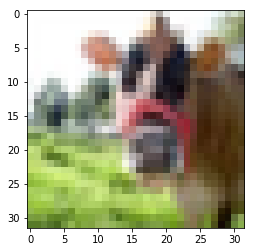

(50000, 32, 32, 3)

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_img_train[0], cmap = plt.cm.binary)
plt.show()


In [33]:
# build our CNN model, 多加幾層

### Alexnet

#input_shape = x_img_train_normalize.shape[1:]
input_shape = (227, 227, 3)
num_classes = 100

model = Sequential()

# 1st Conv
model.add(Conv2D(96, (11, 11), strides=4, padding='valid',
                 input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# 2nd Conv
model.add(Conv2D(256, (5,5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# 3rd Conv
model.add(Conv2D(384, (3,3), strides=1, padding='same', activation='relu'))

# 4th Conv
model.add(Conv2D(384, (3,3), strides=1, padding='same', activation='relu'))

# 5th Conv
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Flatten())

# FC-1
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# FC-2
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# FC-3
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 256)     